神经网络
===

训练一个分类器,对eyes进行分类：sunglasses / open
---

In [2]:
%matplotlib inline
from load_data import load_dataset
import numpy as np
np.set_printoptions(suppress=True)#不已科学记数法输出

from PIL import Image
import sklearn
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pose = ["left", "right", "straight", "up"] #0，1，2，3 依此表示四种类别
experssion = ["angry", "happy", "neutral", "sad"] 
eyes = ["sunglasses", "open"] # 0表示sunglasses， 1表示open
userid = ["an2i", "at33", "boland", "bpm", "ch4f", "cheyer","choon"
          ,"danieln", "glickman", "karyadi", "kawamura", "kk49", "megak"
          ,"mitchell", "night", "phoebe", "saavik", "steffi","sz24","tammo"]
train_set, test_set = load_dataset(eyes, 3)
traindata_size = len(train_set)
testdata_size = len(test_set)
print("train data size:", traindata_size, "\ntest data size:", testdata_size)

train data size: 500 
test data size: 124


In [4]:
train_set_path = "C:\\Users\\chen\\Desktop\\face recognize\\data\\train_data"
test_set_path = "C:\\Users\\chen\\Desktop\\face recognize\\data\\test_data" 

im = Image.open(train_set_path + "\\" + train_set[0][0])
# print(np.array(im).shape)
# plt.imshow(np.array(im))

width = im.size[0]
height=im.size[1]
print("image width:", width, "\nimage height:", height)

feature_size = width * height

im_pixels = np.array(im)
# print(im_pixels)

image width: 32 
image height: 30


数据向量化
---
1. array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors
2. array Y of size (n_samples,), which holds the target values (class labels) for the training samples;

In [5]:
train_X = np.array(Image.open(train_set_path + "\\" + train_set[0][0])).reshape(1, feature_size)
train_Y = np.array(train_set[0][1]).reshape(1, )

test_X = np.array(Image.open(test_set_path + "\\" + test_set[0][0])).reshape(1, feature_size)
test_Y = np.array(test_set[0][1]).reshape(1,)

for item in train_set[1:]:
    subpath = item[0]
    lable = item[1]
    pixels = np.array(Image.open(train_set_path + "\\" + subpath)).reshape(1, feature_size)
    train_X = np.row_stack((train_X, pixels))
    train_Y = np.row_stack((train_Y, lable))
    
for item in test_set[1:]:
    subpath = item[0]
    lable = item[1]
    pixels = np.array(Image.open(test_set_path + "\\" + subpath)).reshape(1, feature_size)
    test_X = np.row_stack((test_X, pixels))
    test_Y = np.row_stack((test_Y, lable))
    
train_Y = train_Y.reshape(traindata_size,)
test_Y = test_Y.reshape(testdata_size,)

assert train_X.shape == (traindata_size, feature_size)
assert train_Y.shape == (traindata_size, )
assert test_X.shape == (testdata_size, feature_size)
assert test_Y.shape == (testdata_size, )

print("train x matrix size:", train_X.shape, "train y matrix size:", train_Y.shape)
print("test x matrix size:", test_X.shape, "test y matrix size:", test_Y.shape)

train x matrix size: (500, 960) train y matrix size: (500,)
test x matrix size: (124, 960) test y matrix size: (124,)


训练
---
>+ 32*30 = 960 features in the dataset
>+ first layer ：960 units
>+ output layer: 2 units 

sklearn neural_network: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
<br>MLPClassifierd()参数： http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(50,50))
clf.fit(train_X,train_Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

测试
---

In [7]:
print("Training set score: %f" % clf.score(train_X, train_Y))
print("Testing set score: %f" % clf.score(test_X, test_Y))

Training set score: 0.976000
Testing set score: 0.814516


predict: open
[[ 0.37770924  0.62229076]]


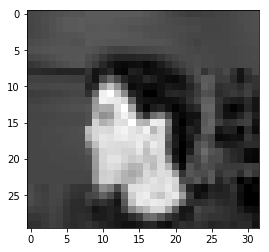

In [23]:
index = 60
plt.imshow(test_X[index].reshape(height, width), cmap ='gray')
predict_value = clf.predict(test_X[index].reshape(1,feature_size))[0]
print("predict:", "sunglasses" if  (predict_value == 0)  else "open" )
print(clf.predict_proba(test_X[index].reshape(1,feature_size)))

<p>选取不同的 hidden_layer_sizes 观察其在训练集和测试集上的score

In [9]:
layers = 1
layer_sizes = 50
count = 0
# mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70,), random_state=1)
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(70,), random_state = 3)#!!!!!random_state=1时正确率极低

mlp.fit(train_X,train_Y)
train_score = mlp.score(train_X, train_Y)
test_score = mlp.score(test_X, test_Y)
print(train_score, test_score)
# for layer in range(1, 50, 2):
#     for size in range(50, 950, 100):
#         count+=1
#         mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(size, layer), random_state=1)
#         mlp.fit(train_X,train_Y)
#         train_score = clf.score(train_X, train_Y)
#         test_score = clf.score(test_X, test_Y)
#         print(layer, size, train_score, test_score)
        
# print(count)
# print(mlp.loss_curve_)
# plt.plot(mlp.loss_curve_)
# mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70,), random_state=1)
# print(pose_clf.loss_curve_)
# plt.plot(pose_clf.loss_curve_ )

1.0 0.967741935484


<p> http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

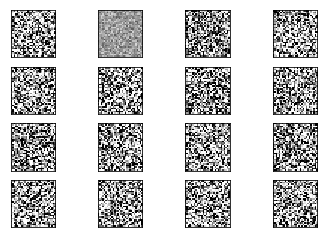

In [10]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(32, 30), cmap=plt.get_cmap('Greys'), vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

分析
---

姿态分类器
---

In [11]:
# pose = ["left", "right", "straight", "up"] #0，1，2，3 依此表示四种类别
pose_train_set, pose_test_set = load_dataset(pose, 1)
pose_traindata_size = len(train_set)
pose_testdata_size = len(test_set)
print("train data size:", pose_traindata_size, "\ntest data size:", pose_testdata_size)

pose_train_X = np.array(Image.open(train_set_path + "\\" + pose_train_set[0][0])).reshape(1, feature_size)
pose_train_Y = np.array(pose_train_set[0][1]).reshape(1, )

pose_test_X = np.array(Image.open(test_set_path + "\\" + pose_test_set[0][0])).reshape(1, feature_size)
pose_test_Y = np.array(pose_test_set[0][1]).reshape(1,)

for item in pose_train_set[1:]:
    subpath = item[0]
    lable = item[1]
    pixels = np.array(Image.open(train_set_path + "\\" + subpath)).reshape(1, feature_size)
    pose_train_X = np.row_stack((pose_train_X, pixels))
    pose_train_Y = np.row_stack((pose_train_Y, lable))
    
for item in pose_test_set[1:]:
    subpath = item[0]
    lable = item[1]
    pixels = np.array(Image.open(test_set_path + "\\" + subpath)).reshape(1, feature_size)
    pose_test_X = np.row_stack((pose_test_X, pixels))
    pose_test_Y = np.row_stack((pose_test_Y, lable))
    
pose_train_Y = pose_train_Y.reshape(traindata_size,)
pose_test_Y = pose_test_Y.reshape(testdata_size,)

assert pose_train_X.shape == (traindata_size, feature_size)
assert pose_train_Y.shape == (traindata_size, )
assert pose_test_X.shape == (testdata_size, feature_size)
assert pose_test_Y.shape == (testdata_size, )

print("train x matrix size:", pose_train_X.shape, "train y matrix size:", pose_train_Y.shape)
print("test x matrix size:", pose_test_X.shape, "test y matrix size:", pose_test_Y.shape)

train data size: 500 
test data size: 124
train x matrix size: (500, 960) train y matrix size: (500,)
test x matrix size: (124, 960) test y matrix size: (124,)


In [12]:
pose_clf = MLPClassifier(hidden_layer_sizes=(70,))
pose_clf.fit(pose_train_X,pose_train_Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
print("Training set score: %f" % pose_clf.score(pose_train_X, pose_train_Y))
print("Testing set score: %f" % pose_clf.score(pose_test_X, pose_test_Y))

Training set score: 0.938000
Testing set score: 0.830645


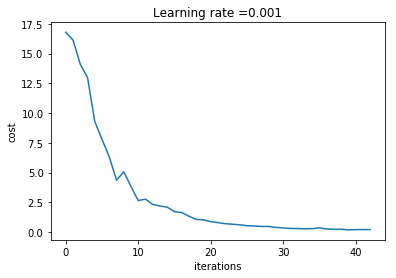

In [14]:
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(pose_clf.loss_curve_)

plt.show()

predict: left
[[ 0.86726851  0.01844291  0.06536232  0.04892626]]


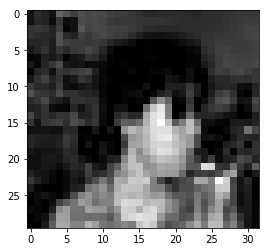

In [29]:
index = 1
plt.imshow(pose_test_X[index].reshape(height, width), cmap ='gray')
# print(pose_clf.predict(pose_test_X[index].reshape(1,feature_size))[0])
predict_value = pose_clf.predict(pose_test_X[index].reshape(1,feature_size))[0]
# pose = ["left", "right", "straight", "up"] #0，1，2，3 依此表示四种类别
# print("人的left、right与相机的相反！")
if predict_value == 0:
    result = "left"
elif predict_value == 1:
    result = "right"
elif predict_value == 2:
    result = "straight"
else: result = "up"
print("predict:", result )

# print(pose_clf.predict_log_proba(pose_test_X[index].reshape(1,feature_size)))
print(pose_clf.predict_proba(pose_test_X[index].reshape(1,feature_size)))

0.95 0.887096774194
40
0.256 0.225806451613
135
0.252 0.266129032258
48


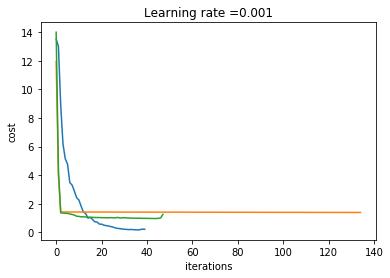

In [16]:
pose_clf = MLPClassifier(hidden_layer_sizes=(70,))
pose_clf.fit(pose_train_X,pose_train_Y)
plt.plot(pose_clf.loss_curve_)
train_score = pose_clf.score(pose_train_X, pose_train_Y)
test_score = pose_clf.score(pose_test_X, pose_test_Y)
print(train_score, test_score)
print(len(pose_clf.loss_curve_))

pose_clf = MLPClassifier(hidden_layer_sizes=(70,10))
pose_clf.fit(pose_train_X,pose_train_Y)
plt.plot(pose_clf.loss_curve_)
train_score = pose_clf.score(pose_train_X, pose_train_Y)
test_score = pose_clf.score(pose_test_X, pose_test_Y)
print(train_score, test_score)
print(len(pose_clf.loss_curve_))

pose_clf = MLPClassifier(hidden_layer_sizes=(70,70,10))
pose_clf.fit(pose_train_X,pose_train_Y)
plt.plot(pose_clf.loss_curve_)
train_score = pose_clf.score(pose_train_X, pose_train_Y)
test_score = pose_clf.score(pose_test_X, pose_test_Y)
print(train_score, test_score)
print(len(pose_clf.loss_curve_))

model_params = pose_clf.get_params()
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(model_params["learning_rate_init"]))
plt.show()

C:\chen environment\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


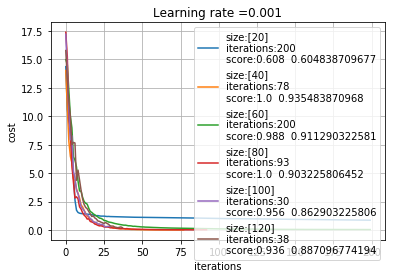

In [17]:
def _analyse(hidden_layer_array):
    for hidden_layer in hidden_layer_array:
        #print(hidden_layer)
        pose_clf = MLPClassifier(hidden_layer,warm_start=True)
        pose_clf.fit(pose_train_X,pose_train_Y)
        
        train_score = pose_clf.score(pose_train_X, pose_train_Y)
        test_score = pose_clf.score(pose_test_X, pose_test_Y)
        iterations = len(pose_clf.loss_curve_)
        
        plt.plot(pose_clf.loss_curve_,
                 label= "size:"+str(hidden_layer)
                 +"\niterations:"+str(iterations)
                 +"\nscore:"+str(train_score)+"  "+str(test_score)
                )
    return

# hidden_layer_array = [[20,],[40,],[60,],[80,],[100,],[120,]]
hidden_layer_array = [[20,],[40,],[60,],[80,],[100,],[120,]]

# hidden_layer_array = [[50,],[50,50,50],[50,50,50,50,50],[50,50,50,50,50,50,50],[50,50,50,50,50,50,50,50,50],[50,50,50,50,50,50,50,50,50,50,50]]
# hidden_layer_array = [[50,]]
# hidden_layer_array = [[50,],[50,50],[50,50,50], [50,50,50,50], [50,50,50,50,50],[50,50,50,50,50,50]]

_analyse(hidden_layer_array)

model_params = pose_clf.get_params()
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(model_params["learning_rate_init"]))
plt.grid(True)
plt.legend()
plt.show()

In [18]:
# print(help(plt))
unit_sizes = [10,30,50,70,90,11]
layer_sizes = [1,3,5,7,9,11]
score=[[11,111,1111],[]]
# plt.scatter(unit_sizes,layer_sizes,score,marker='o')

In [19]:
pose_clf = MLPClassifier(activation="logistic",warm_start=True)
pose_clf.fit(pose_train_X,pose_train_Y)
train_score = pose_clf.score(pose_train_X, pose_train_Y)
test_score = pose_clf.score(pose_test_X, pose_test_Y)
iterations = len(pose_clf.loss_curve_)
        
plt.plot(pose_clf.loss_curve_,
         label= "size:"+str(hidden_layer)
         +"\niterations:"+str(iterations)
         +"\nscore:"+str(train_score)+"  "+str(test_score))

NameError: name 'hidden_layer' is not defined